In [1]:
import argparse
import random
import numpy as np
import time
import sys
import json
import os
from datetime import datetime
from tqdm import tqdm
from auxiliary_functions import read_file, sum_list_of_int, print_json
from population import get_forward_population_gender_based_monoamorous_couples
from genealogical_ancestors import get_genealogical_ancestors
from genetic_ancestors import get_genetic_ancestors
from genealogical_descendants import get_genealogical_descendants
from genetic_descentants import get_genetic_descendants
from ibd_analysis import calculate_ibd_proportion

In [17]:
seed_n = 395
random.seed(seed_n)
np.random.seed(seed_n)
chrom_lengths = read_file("./chrom_length.txt")

data = {
        'pop_size':50,
        'num_gen': 100,
        'recomb_rate': 1e-8,
        'seed': seed_n,
        'chrom_lengths': chrom_lengths,
        'seq_len': sum_list_of_int(chrom_lengths),
        'kappa_parameter': 20,
    }

In [18]:
forward_pop,mom_time_list_per_gen, mom_time_list_per_gen_count, average_mom_time_all = get_forward_population_gender_based_monoamorous_couples(data['pop_size'], data['num_gen'], chrom_lengths, data['recomb_rate'], data['kappa_parameter'])

[DEBUG] : GEN 0
[DEBUG] : ind == 0
[DEBUG] : ind == 1
[DEBUG] : ind == 2
[DEBUG] : ind == 3
[DEBUG] : ind == 4
[DEBUG] : ind == 5
[DEBUG] : ind == 6
[DEBUG] : ind == 7
[DEBUG] : ind == 8
[DEBUG] : ind == 9
[DEBUG] : ind == 10
[DEBUG] : ind == 11
[DEBUG] : ind == 12
[DEBUG] : ind == 13
[DEBUG] : ind == 14
[DEBUG] : ind == 15
[DEBUG] : ind == 16
[DEBUG] : ind == 17
[DEBUG] : ind == 18
[DEBUG] : ind == 19
[DEBUG] : ind == 20
[DEBUG] : ind == 21
[DEBUG] : ind == 22
[DEBUG] : ind == 23
[DEBUG] : ind == 24
[DEBUG] : ind == 25
[DEBUG] : ind == 26
[DEBUG] : ind == 27
[DEBUG] : ind == 28
[DEBUG] : ind == 29
[DEBUG] : ind == 30
[DEBUG] : ind == 31
[DEBUG] : ind == 32
[DEBUG] : ind == 33
[DEBUG] : ind == 34
[DEBUG] : ind == 35
[DEBUG] : ind == 36
[DEBUG] : ind == 37
[DEBUG] : ind == 38
[DEBUG] : ind == 39
[DEBUG] : ind == 40
[DEBUG] : ind == 41
[DEBUG] : ind == 42
[DEBUG] : ind == 43
[DEBUG] : ind == 44
[DEBUG] : ind == 45
[DEBUG] : ind == 46
[DEBUG] : ind == 47
[DEBUG] : ind == 48
[DEBUG] : ind 

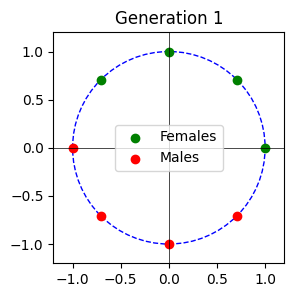

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def draw_circle(list_of_rads, generation, figsize):
    # Convert to Cartesian coordinates
    x = np.cos(list_of_rads)
    y = np.sin(list_of_rads)

    # Split the points into two halves
    half_len = len(list_of_rads) // 2
    first_half_rads = list_of_rads[:half_len]
    second_half_rads = list_of_rads[half_len:]

    # Convert both halves to Cartesian coordinates
    x_first_half = np.cos(first_half_rads)
    y_first_half = np.sin(first_half_rads)

    x_second_half = np.cos(second_half_rads)
    y_second_half = np.sin(second_half_rads)

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(3,3))

    # Draw the circle
    circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='dashed')
    ax.add_patch(circle)

    # Plot the first half points in green
    ax.scatter(x_first_half, y_first_half, color='green', label="Females")

    # Plot the second half points in red
    ax.scatter(x_second_half, y_second_half, color='red', label="Males")

    # Formatting the plot
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_aspect('equal')  # Keep the circle aspect ratio
    ax.legend()
    plt.title(f"Generation {generation}")

    # Show the plot
    plt.show()

# Example usage
rads = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]
generation_number = 1 
figsize=(3,3)
draw_circle(rads, generation_number, figsize)


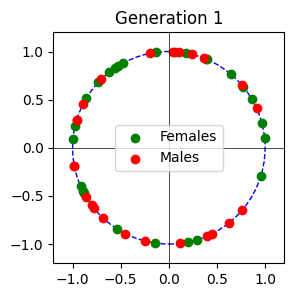

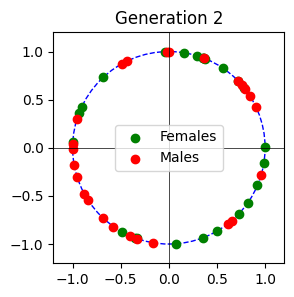

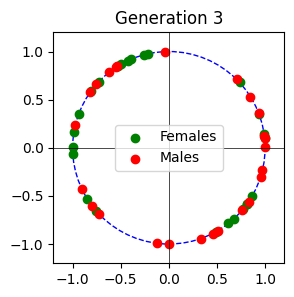

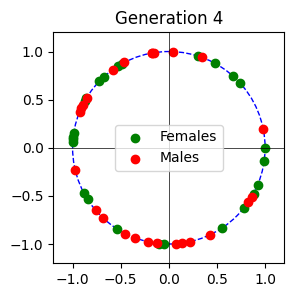

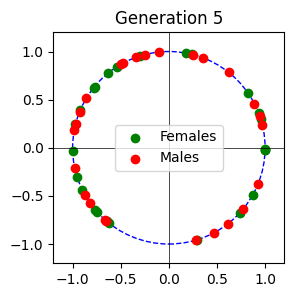

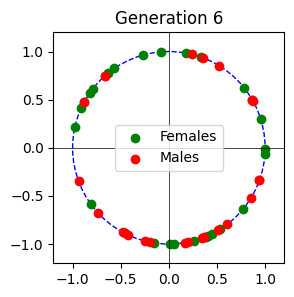

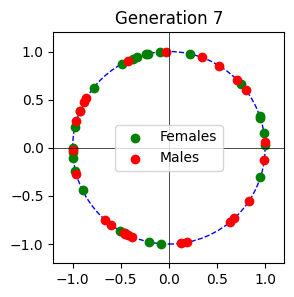

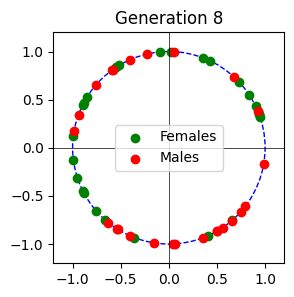

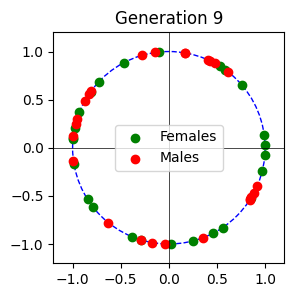

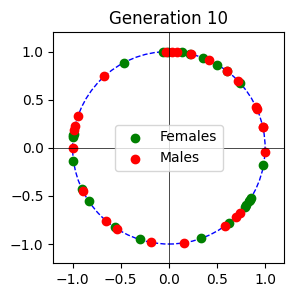

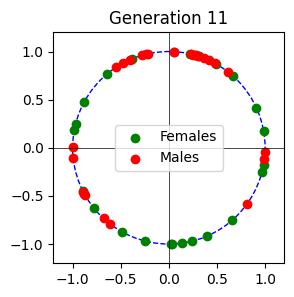

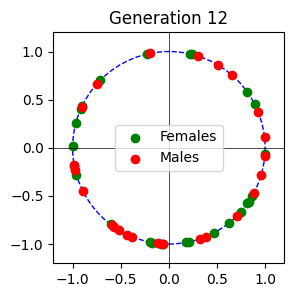

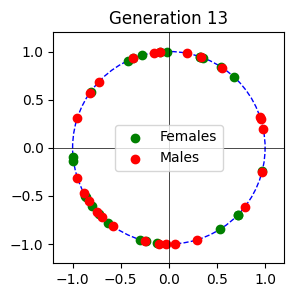

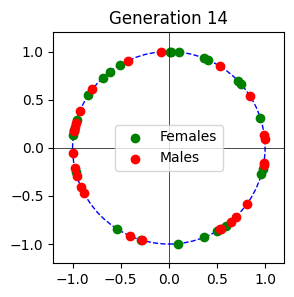

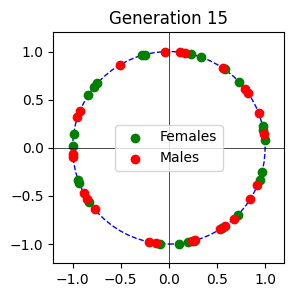

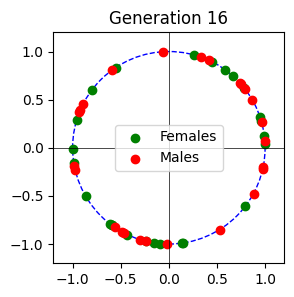

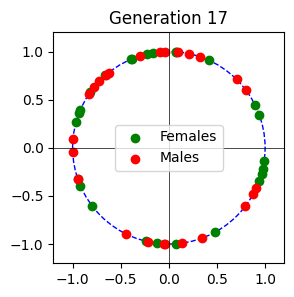

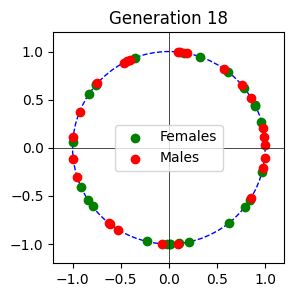

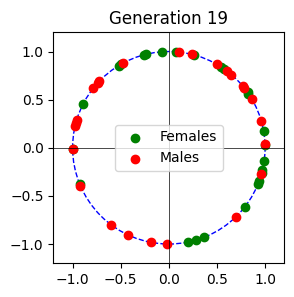

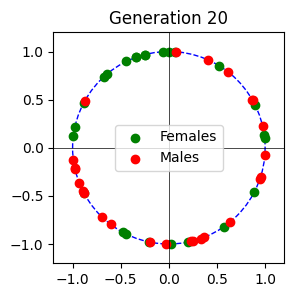

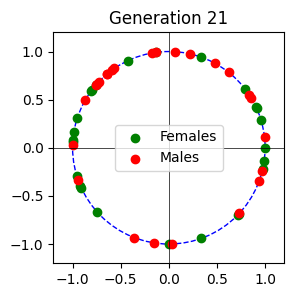

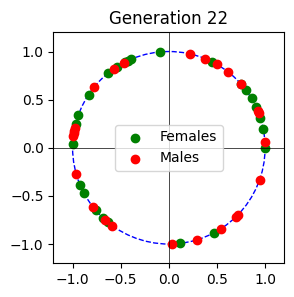

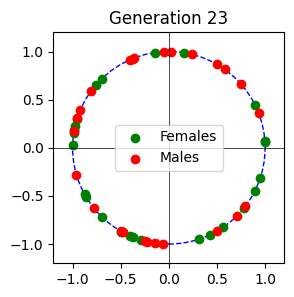

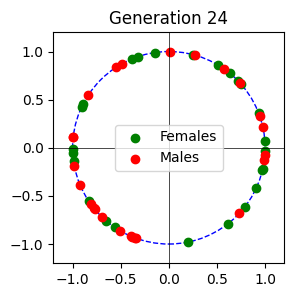

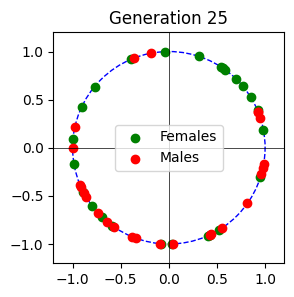

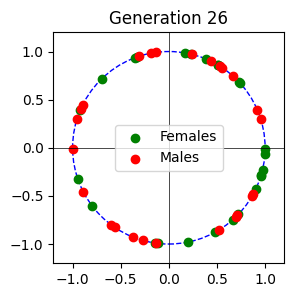

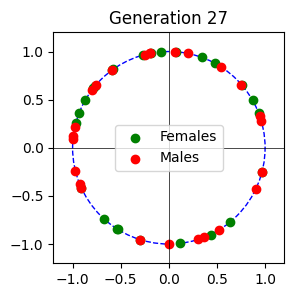

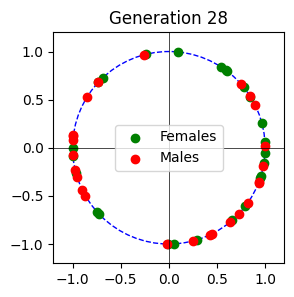

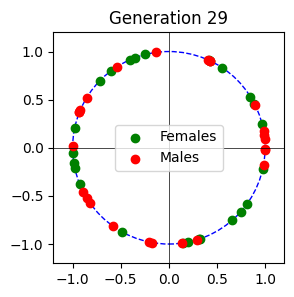

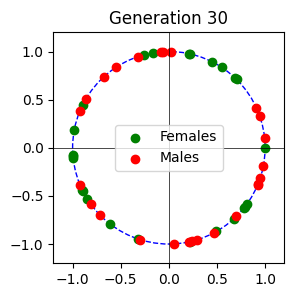

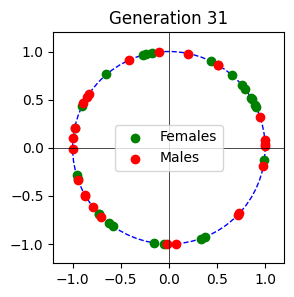

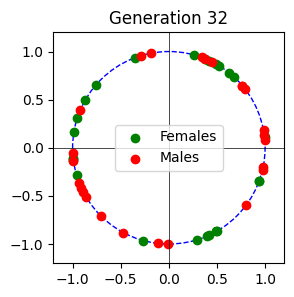

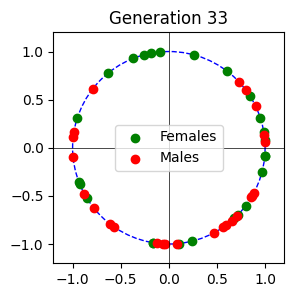

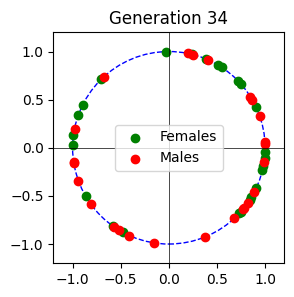

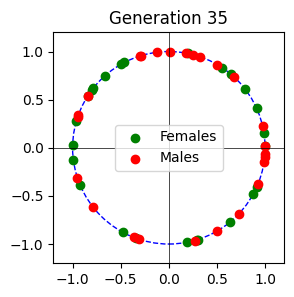

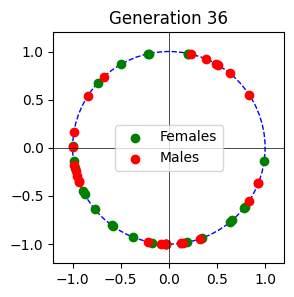

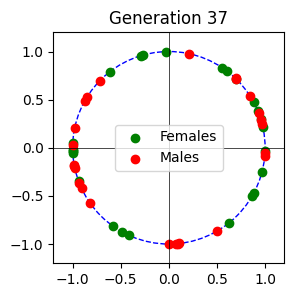

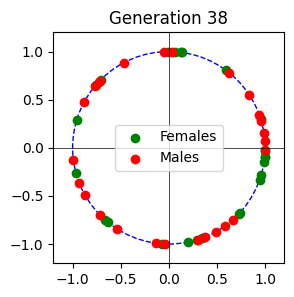

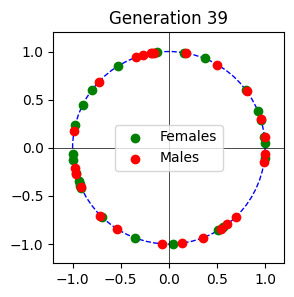

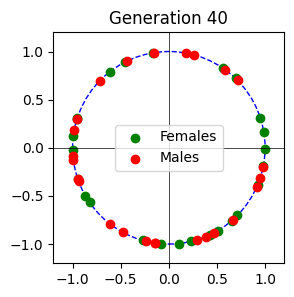

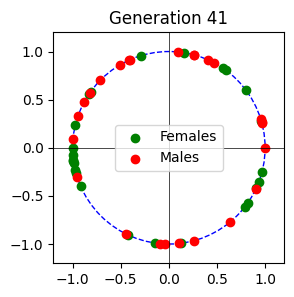

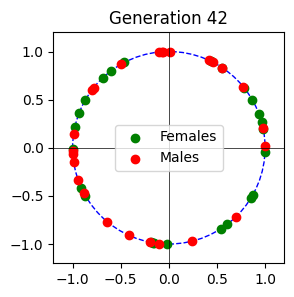

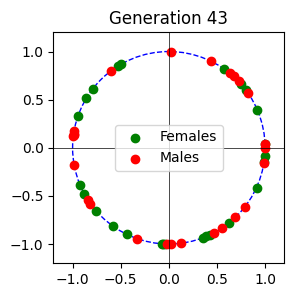

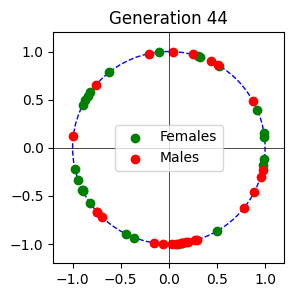

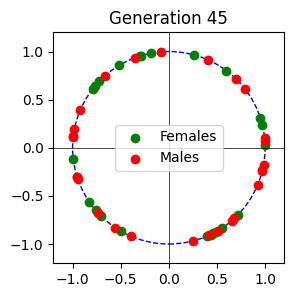

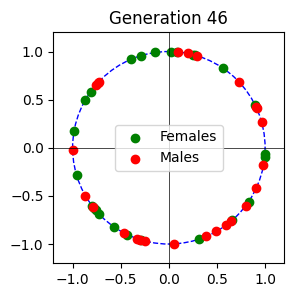

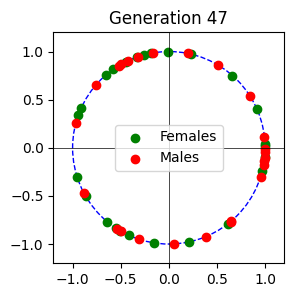

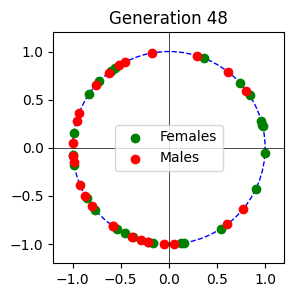

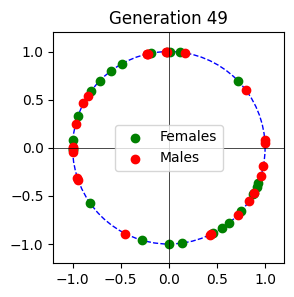

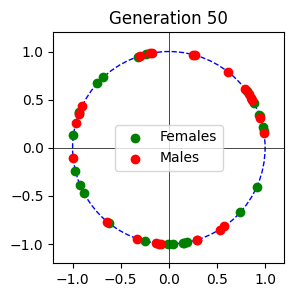

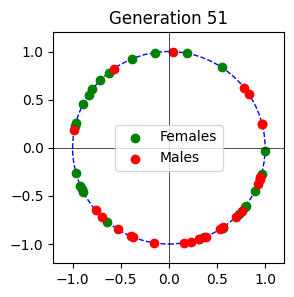

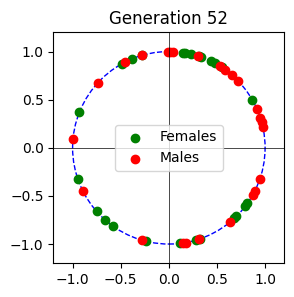

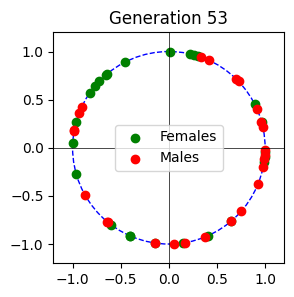

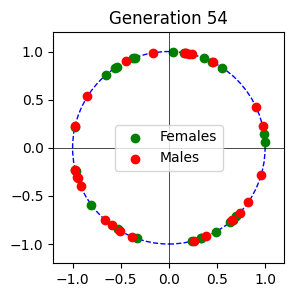

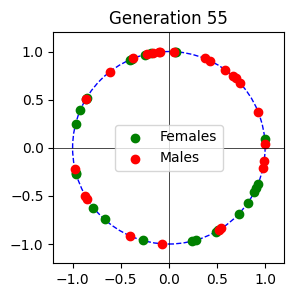

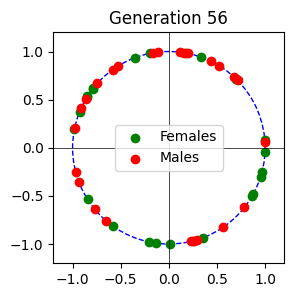

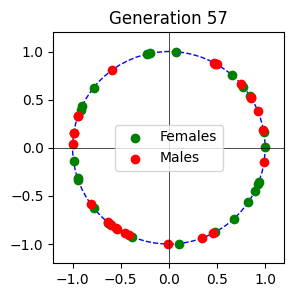

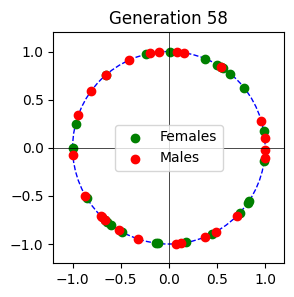

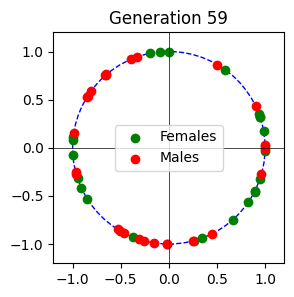

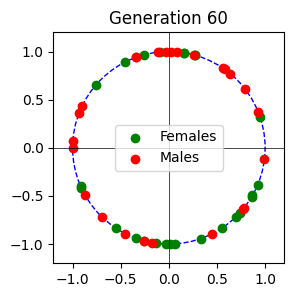

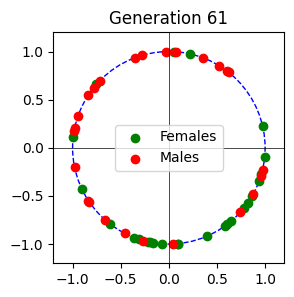

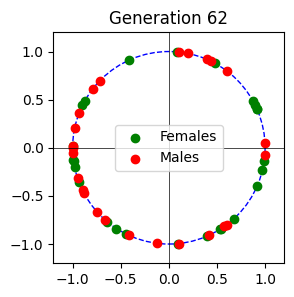

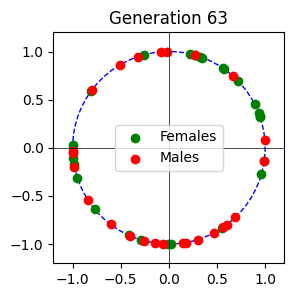

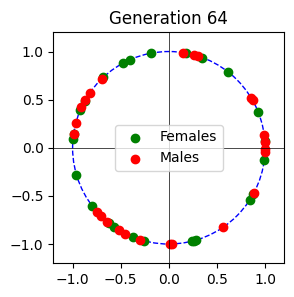

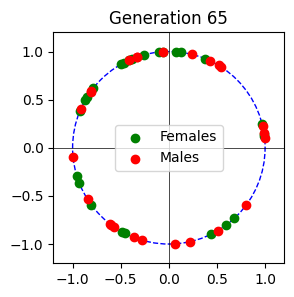

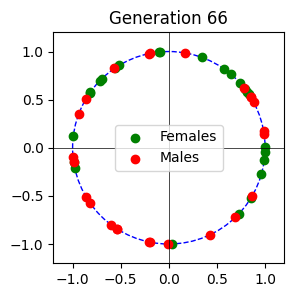

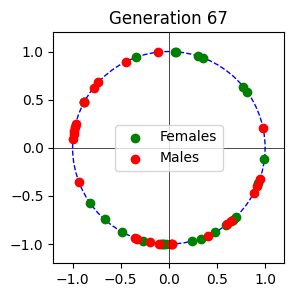

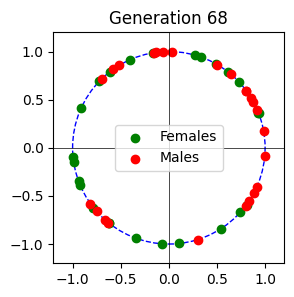

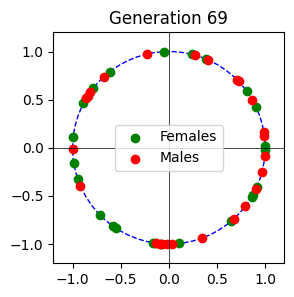

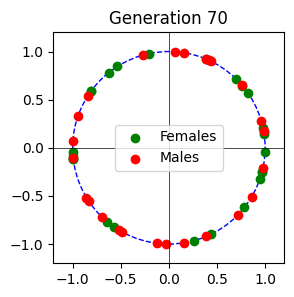

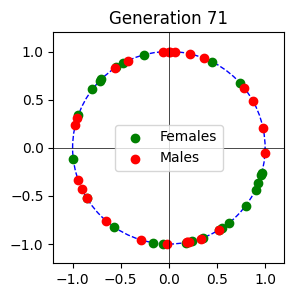

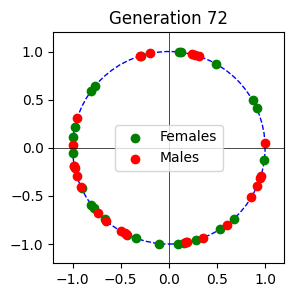

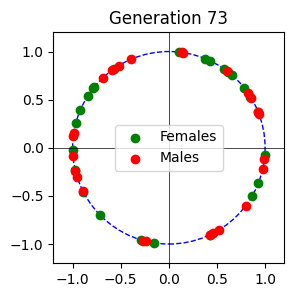

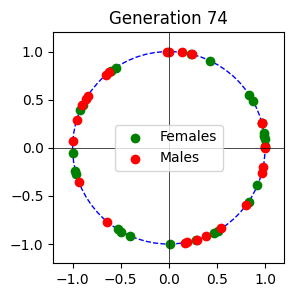

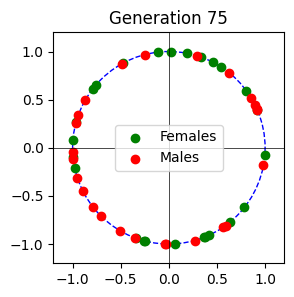

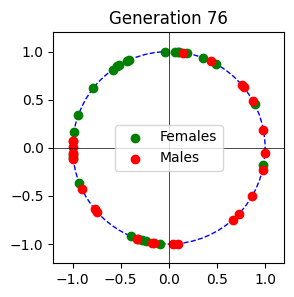

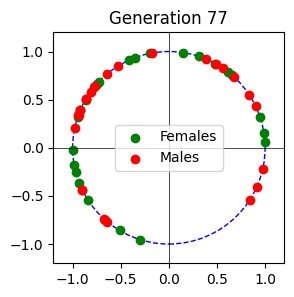

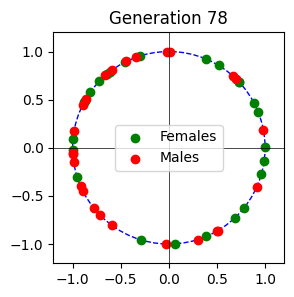

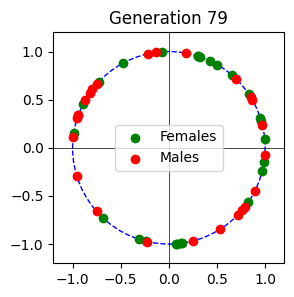

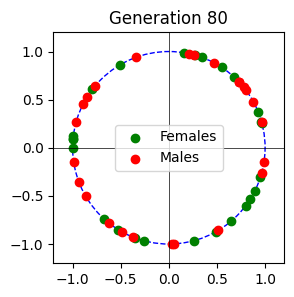

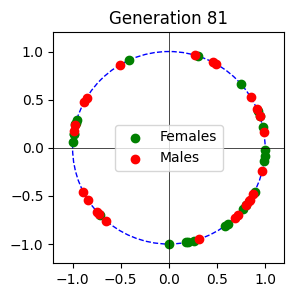

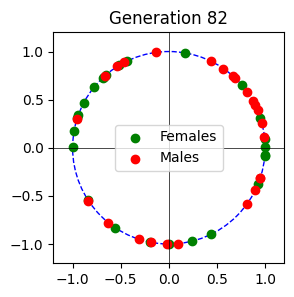

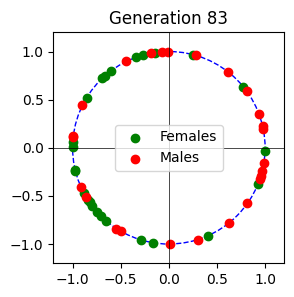

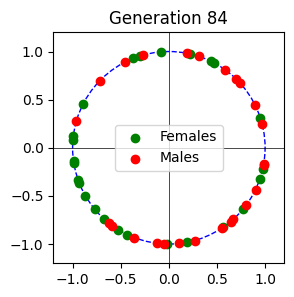

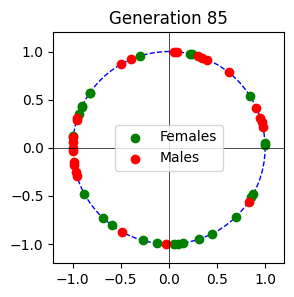

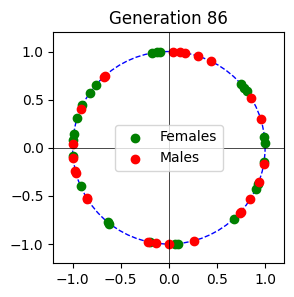

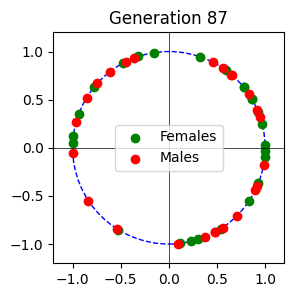

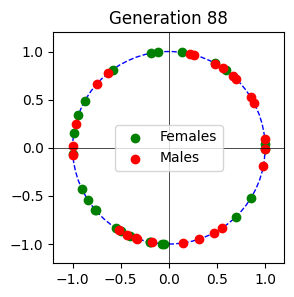

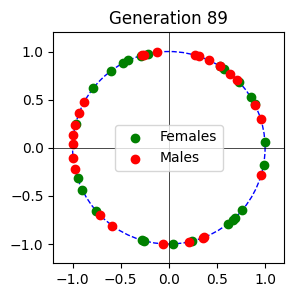

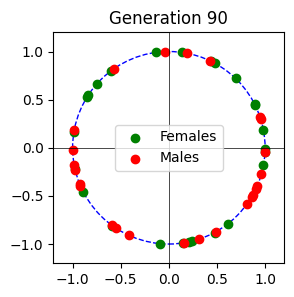

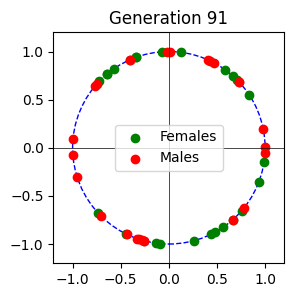

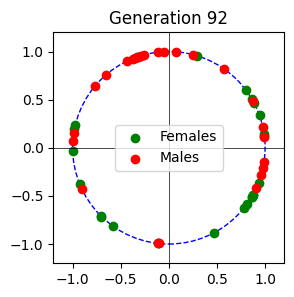

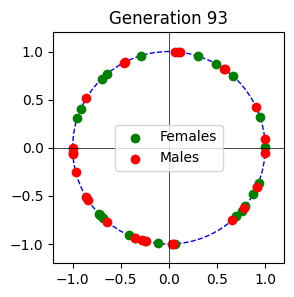

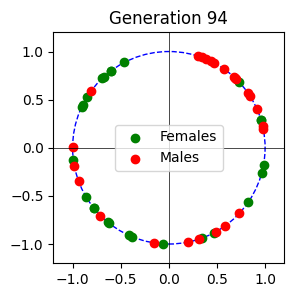

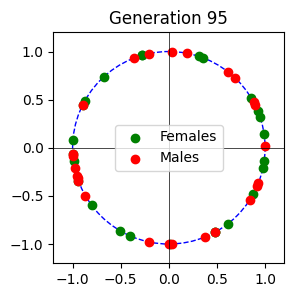

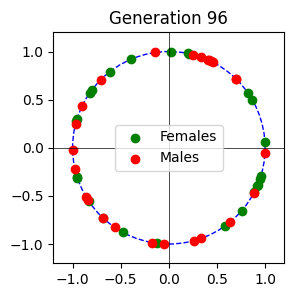

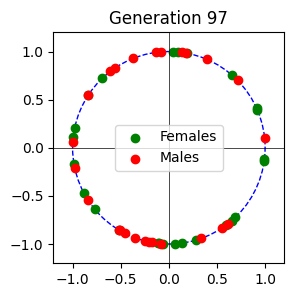

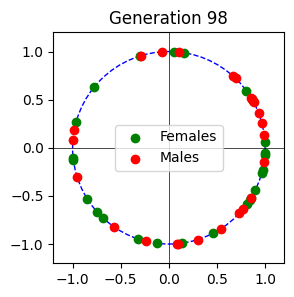

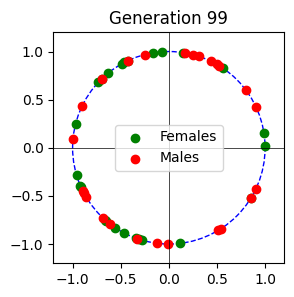

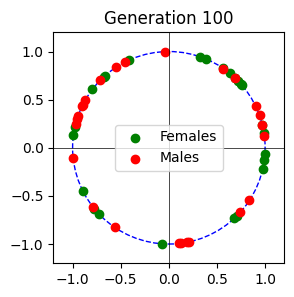

In [20]:
# Assuming 'forward_pop' is a list of populations for different generations,
# and 'generation_number' is the index of the generation you are accessing
for j in range(0,100):
    generation_number = j  # or any specific generation index you are working with
    draw_circle([i.location for i in forward_pop[generation_number]], generation_number + 1, figsize=(1,1))
